In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [2]:
classes = { "WWewk": 0, "top":1 }
signal_name = "WWewk"
sample_names = ["WWewk", "top"]

In [3]:
samples = {}

In [4]:
base_dir="/eos/home-b/bpinolin/ML_output/"
plot_config="VBSOS"
cut= "sr"
version = "v0"

In [5]:
samples_dir = os.path.join(base_dir, plot_config, cut, "samples/" + version)

In [6]:
for file in os.listdir(samples_dir):
    if os.path.isdir(os.path.join(samples_dir, file)): continue
    sname = file.split("_part")[0]
    print(sname)
    s = pickle.load(open(os.path.join(samples_dir, file), "rb"))
    s.rename(columns=lambda c: c.split(cut+"_")[1] if cut in c else c, inplace=True)
    s["sample_name"]= sname
    s["class"] = classes[sname]
    if sname == signal_name:
        s["signal"] = 1
    else: 
        s["signal"] = 0
    if sname in samples:
        samples[sname] = pd.concat([samples[sname], s], ignore_index=True)
    else:
        samples[sname] = s

WWewk
top
top


In [7]:
for s, df in samples.items():
    print(f"Sample name {s:10}, nsamples: {len(df):10},   XS total: {(df.weight_).sum()*41.5 :15}")

Sample name WWewk     , nsamples:      11160,   XS total: 194.90887686980656
Sample name top       , nsamples:      48338,   XS total: 6357.026890780947


In [8]:
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
from sklearn.preprocessing import LabelEncoder 

In [9]:
# _ = plt.hist(samples["WWewk"]["weight_"], bins=100, range=(0,0.001))

# Balancing

In [10]:
bkg_list = []
bkg_names = [ name for name in sample_names if name != signal_name ]
for bkg_name in bkg_names:
    bkg_list.append(samples[bkg_name])

In [11]:
background = pd.concat(bkg_list, ignore_index=True)

In [12]:
signal = samples["WWewk"]

In [13]:
signal

,detajj,ptll,eta1,eta2,detall,jetpt1,jetpt2,met,dphill,dphijj,...,dR_jl2,Zeppll,Zepp1,Zepp2,mjj,events,weight_,sample_name,class,signal
0,2.236816,70.748985,-0.063477,-0.836060,0.772583,90.18750,48.75000,89.287407,1.719709,3.488770,...,1.411285,0.475159,-0.088867,-0.861450,224.221939,1,0.001164,WWewk,0,1
1,3.979004,155.971222,0.817871,-1.069092,1.886963,401.00000,305.50000,50.212433,1.112679,3.618408,...,1.514178,0.041138,0.984619,-0.902344,2602.338135,1,0.000434,WWewk,0,1
2,2.954163,50.700325,0.782593,-0.005880,0.788473,135.37500,94.75000,63.421825,1.934052,2.129395,...,2.994707,0.678508,-0.284271,-1.072744,511.289093,1,0.000554,WWewk,0,1
3,5.474609,93.144318,-0.704956,-0.559204,0.145752,43.31250,35.78125,44.615372,2.254883,1.682495,...,2.250687,0.477783,0.404907,0.550659,609.029907,1,0.000247,WWewk,0,1
4,4.660767,51.991955,-0.454163,2.080078,2.534241,186.12500,96.62500,117.904259,1.247192,3.872925,...,3.056076,0.674530,-1.941650,0.592590,1389.679565,1,0.000354,WWewk,0,1
5,2.599487,132.112076,0.029804,-2.126465,2.156269,220.25000,85.50000,113.535789,1.751587,2.320312,...,3.158605,0.181223,1.259357,-0.896912,531.875549,1,0.000440,WWewk,0,1
6,8.474609,53.375591,-1.135254,0.681519,1.816772,55.43750,55.12500,86.147919,1.536655,3.823486,...,3.575173,0.141907,-1.050293,0.766479,3827.278076,1,0.000186,WWewk,0,1
7,4.901855,180.715546,-0.725586,0.433472,1.159058,80.50000,78.18750,53.229465,0.417969,0.751648,...,3.787489,0.045593,-0.533936,0.625122,915.561768,1,0.000215,WWewk,0,1
8,5.714355,123.914299,-0.075195,-0.674438,0.599243,169.25000,104.56250,63.622219,2.261719,2.536041,...,2.013100,0.966858,-0.667236,-1.266479,2323.276367,1,0.000332,WWewk,0,1
9,4.242188,78.103149,-0.150848,1.280029,1.430878,207.00000,73.68750,189.865967,0.796387,0.895233,...,1.730551,0.081406,-0.796844,0.634033,1021.881897,1,0.000169,WWewk,0,1


ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

tot_ev_weighted_sig = (signal.weight_ / signal.weight_.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

rescale_factor_bkg = (tot_ev_weighted_sig *ratio_neve_bkgsignal )/ background.weight_.sum()
print(rescale_factor_bkg)

signal["weight_norm"] = signal.weight_ / signal.weight_.mean()
background["weight_norm"] = background.weight_ * rescale_factor_bkg

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

In [14]:
## normalization by bkg events

ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

tot_ev_weighted_bkg = (background.weight_ / background.weight_.mean()).sum()
print("TOT bkg weighted events", tot_ev_weighted_bkg)

rescale_factor_sig  = (tot_ev_weighted_bkg )/ signal.weight_.sum()
print("Rescale facor for signal", rescale_factor_sig)

signal["weight_norm"] = signal.weight_ * rescale_factor_sig
background["weight_norm"] = background.weight_ / background.weight_.mean()

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

4.331362007168459
TOT bkg weighted events 48338.00000000001
Rescale facor for signal 10292.127440352384
Effective sig events:  48338.00000000001
Effective bkg events:  48338.00000000001


In [15]:
## normalization by signal events

tot_ev_weighted_sig = (signal.weight_ / signal.weight_.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

rescale_factor_bkg = (tot_ev_weighted_sig )/ background.weight_.sum()
print(rescale_factor_bkg)

signal["weight_norm"] = signal.weight_ / signal.weight_.mean()
background["weight_norm"] = background.weight_ * rescale_factor_bkg

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

TOT signal weighted events 11160.0
72.85481215623805
Effective sig events:  11160.0
Effective bkg events:  11160.0


# Save signal and bkg samples

In [16]:
import os

os.makedirs(os.path.join(samples_dir, "for_training"), exist_ok=True)
pickle.dump(background, open(os.path.join(samples_dir, "for_training/background_balanced.pkl"), "wb"))
pickle.dump(signal, open(os.path.join(samples_dir, "for_training/signal_balanced.pkl"), "wb"))

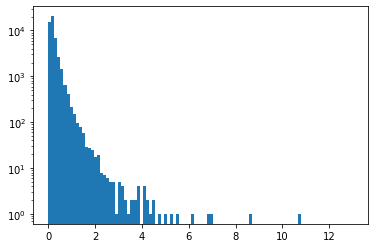

In [17]:
plt.hist(background["weight_norm"], bins=100, range=(0, 13))
plt.yscale("log")

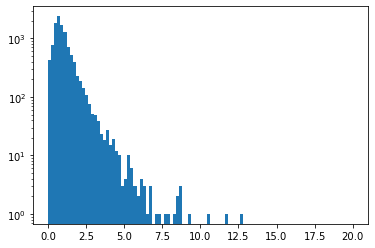

In [18]:
plt.hist(signal["weight_norm"], bins=100, range=(0, 20))
plt.yscale("log")

In [19]:
lumi = 59.74
print("Ns = ", round((signal.weight_).sum()*lumi,1))
print("Nb = ", round((background.weight_).sum()*lumi,1))

Ns =  280.6
Nb =  9151.1


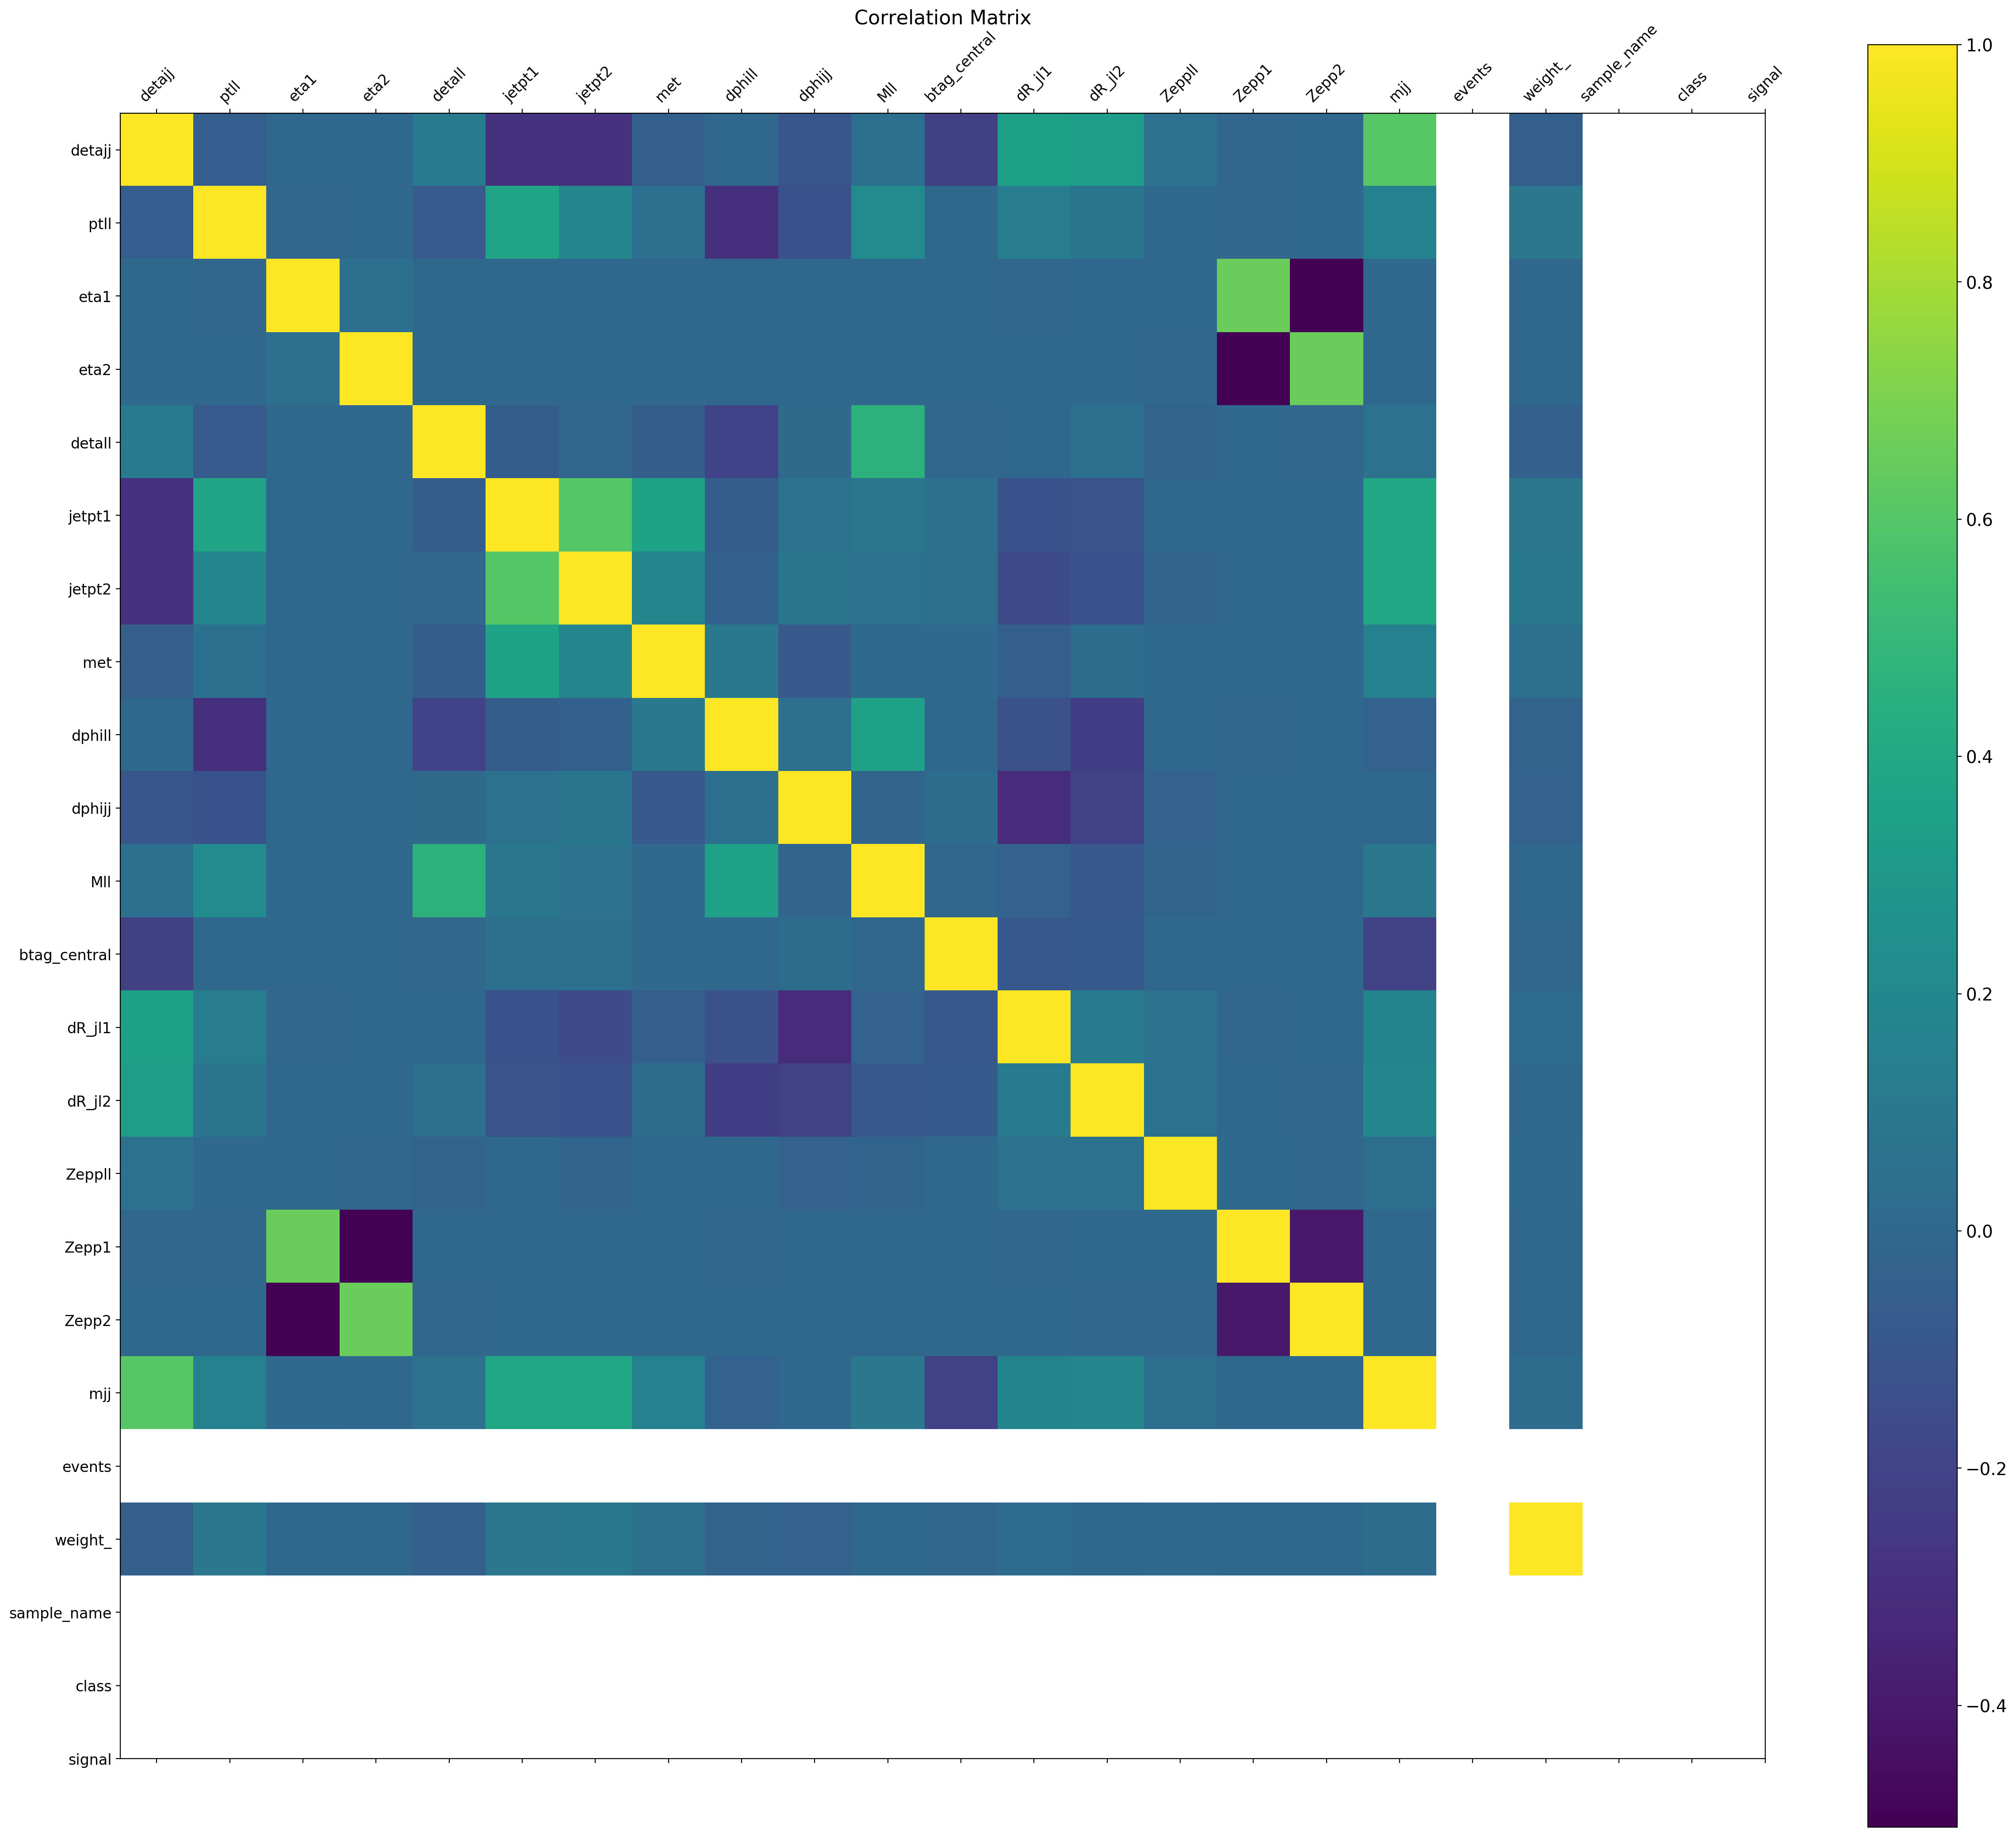

In [20]:
f = plt.figure(figsize=(30, 26), dpi=200)
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [21]:
df.columns

Index(['detajj', 'ptll', 'eta1', 'eta2', 'detall', 'jetpt1', 'jetpt2', 'met',
       'dphill', 'dphijj', 'Mll', 'btag_central', 'dR_jl1', 'dR_jl2', 'Zeppll',
       'Zepp1', 'Zepp2', 'mjj', 'events', 'weight_', 'sample_name', 'class',
       'signal'],
      dtype='object')